## MNIST Data

Binary classification based on MNIST data. 

It restricts the classification problem to two digits, selects them from the MNIST dataset, splits it up into a train and test part and then trains a binary classification (logistic regression) to learn to differentiate between the two digits.

The MNIST dataset consists of images with 28x28 = 784 pixel each. The features refer to these pixel values of the MNIST images.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets as ds 

#get local download folder where data is stored
#you may change this in the call fetch_openml() below
data_h = ds.get_data_home()
print(data_h)

C:\Users\romain.capocasa\scikit_learn_data


In [2]:
#the first time this will download the data from the internet and put to a local folder 

mnist = ds.fetch_openml(name='mnist_784', data_home = data_h)

#digit is a "bunch" i.e. similar to a dictionary
print(type(mnist))
#show the keys of digit
print(mnist.keys())
#get data i.e. the image (x) and labels (y)
x = mnist['data']
#as compare to the in class activity we convert the labels here to int
y = np.array(mnist['target'], dtype='int')
#get the respective shape
print("x shape:", x.shape)
print("y shape:", y.shape)

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
x shape: (70000, 784)
y shape: (70000,)


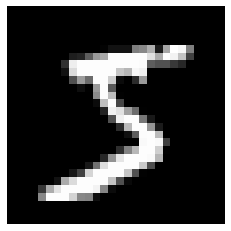

In [3]:
def plot_img(img):
    fig, ax = plt.subplots()
    ax.imshow(img, cmap=plt.cm.gray)
    ax.set_axis_off()
    
    
img = x[0,:].reshape((28,28))
plot_img(img)

In [4]:
def plot_tiles(x_array, rows, cols = -1, fig_size = [10,10]):
    """
    plot list of mnist images as single image

    Arguments:
    x_array -- array of mnist images (being organised as ROWS!)
    rows/cols -- an image of rows x cols - mnist images is created (if x_array is smaller zeros ared padded)
    fig_size -- size of full image created (default [10,10])
    """
    #fix value for minist (change to 8 for mninst light)
    digit_size = 28
    #use rows = cols as default
    if cols < 0:
        cols = rows
        
    if x_array.shape[0] < rows*cols:
        cols = int(x_array.shape[0]/rows)
        remain = np.mod(x_array.shape[0], rows)
        if 0 < remain:
            cols += 1
            x_array = np.append(x_array, np.zeros((rows-remain, x_array.shape[1])), 0)    
        
    img = x_array[0:rows,:].reshape(rows*digit_size,digit_size)
    for i0 in range(1,cols):
        #the reshape operator in the append call takes num of digit_size x digit_size images and 
        #puts them in a single column; append then does the rest
        img = np.append(img, x_array[i0*rows:(i0+1)*rows,:].reshape(rows*digit_size,digit_size),1)

    fig = plt.figure(figsize = fig_size)
    ax = fig.subplots()
    ax.imshow(img, cmap=plt.cm.gray)
    ax.set_axis_off()

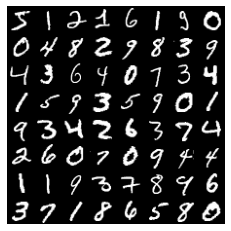

In [5]:
#append rows x cols tiles of digits
rows = 8
cols = 8
#figure size can be set
fig_size = [4,4]

plot_tiles(x, rows, cols, fig_size)

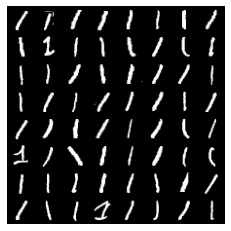

In [6]:
#choose a given digit 0..9
digit  = 1

plot_tiles(x[y == digit,:], rows, cols, fig_size)

In [7]:
#select the two digits for your training and test set
digit_1 = 1
digit_2 = 7

x_sel_1 = x[y == digit_1,:]
x_sel_2 = x[y == digit_2,:]

x_sel = np.append(x_sel_1, x_sel_2, 0)
y_sel = np.append(np.zeros((x_sel_1.shape[0],1)),
                  np.ones((x_sel_2.shape[0],1)), 0)

from sklearn import model_selection as ms

#define train and test split
x_train, x_test, y_train, y_test = ms.train_test_split(x_sel, y_sel, 
                                     test_size=0.20, random_state=1)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(12136, 784) (3034, 784) (12136, 1) (3034, 1)


### Class GradientDescent

This class summarises the gradient descent steps. The training and test data is given as dictionary (c.f. cell directly below the class definition for an example). The class can be called, however only a dummy implementation is given (weigths w and bias b are always 0). Replace the dummy parts with your own implementation and test it.


In [8]:
class GradientDescent:    
    """
    obtains train and test data in the constructor and does the gradient descend
    """    
    cost_MSE = 0
    cost_CE = 1
    
    def __init__(self, data, alpha = 0.5, cost_function=cost_MSE, random_std = 0):
        """
        constructor
        
        Arguments:
        data -- dictionary with data
        cost_function -- can be cost_MSE (0, default) or cost_CE (1)
        random_std -- std for initialisation of weight (default is 0)
        """
        #keep local copy of data
        self.data = data
        self.alpha = alpha
        self.cost_function = cost_function
        
        #normalize data
        self.normalise_data()
        
        #initialize weights and bias (zero or random)
        self.initialise_weights(random_std)
        
        #result array
        self.result_data = np.array([])
      
    
    def normalise_data(self):
        """
        normalize the input data
        """    
        ### START YOUR CODE ###

        #separate normalisation of train and test data
        self.data['x_train'] /= 255
        self.data['x_test'] /= 255
        
        ### END YOUR CODE ###
    
    
    def initialise_weights(self, random_std):
        """
        initialise weights
        """ 
        #initialize weights and bias (if random_std == 0 all weights are zero)
        self.w = random_std*np.random.randn(self.data['x_train'].shape[1],1)
        self.b = 0
    
    
    def calc_error(self, y_pred, y):
        """
        get error information
        """
        m = y.shape[0]
        
        res = np.round(y_pred)        
        train_error = np.sum(np.abs(res - y)) / m 
        
        return train_error
    
        
    def append_result(self, epochs):
        """
        append cost and error data to output array
        """  
        #first call
        res_data = np.array([[epochs, self.cost[0], self.calc_error(self.y_pred[0], self.data['y_train']),
                                      self.cost[1], self.calc_error(self.y_pred[1], self.data['y_test'])]])
        if self.result_data.size == 0:
            self.result_data = res_data
        else:
            self.result_data = np.append(self.result_data, res_data, 0)
            
        return res_data
            

    def cost_funct(self, y_pred, y):
        """
        calculates the chosen cost function for given values of w and b
        """
        m = y.shape[0]
               
        if self.cost_function == self.cost_MSE:
            
        ### START YOUR CODE ###
        
            cost = np.sum(np.power(y_pred - y, 2)) / (2 * m)

        else:
            cost = np.sum(y*np.log(y_pred) + (1 -y)*np.log(1-y_pred))/m

            
        ### END YOUR CODE ###
        
        return cost        
    
    
    def grad_cost(self):
        """
        calculates the gradients of cost function wrt w and b
        """
        #abbreviation
        y_pred = self.y_pred[0]
        x = self.data['x_train']
        y = self.data['y_train']
        m = x.shape[0]
        n = x.shape[1]
        
        if self.cost_function == self.cost_MSE:
            
        ### START YOUR CODE ###
            
            tmp = y_pred * (1-y_pred) * (y_pred - y)
        
            grad_w = np.zeros((n,1))
            for k in range(n):
                grad_w[k,0] = np.dot(tmp.T, x[:,k])
        
            grad_b = np.sum(tmp)
        else:  
            
            tmp = y_pred - y
            grad_w = np.zeros((n,1))
            
            for k in range(n):
                grad_w[k,0] = np.dot(tmp.T, x[:,k])
            
            grad_b = np.sum(tmp)
            
        ### END YOUR CODE ###   
                                      
        return grad_w.T, grad_b
    
    
    def predict(self, x):
        """
        implementation of sigmoid function
        """    
        
        ### START YOUR CODE ###
        sigmoid = lambda z: 1 / (1 + np.exp(-z))

        return sigmoid(np.dot(x,self.w) + self.b)
    
        ### END YOUR CODE ###   
              
    
    def update(self):
        """
        performs one gradient descend step
        """
        #predicted outcome for train [0] and test data [1]
        self.y_pred = [self.predict(self.data['x_train']), self.predict(self.data['x_test'])]
        
        grad_w, grad_b = self.grad_cost()
        
        ### START YOUR CODE ###
                
        self.w -= self.alpha * grad_w.T
        self.b -= self.alpha * grad_b
        
        ### END YOUR CODE ###   
        
        #determine cost functions for train [0] and test data [1]
        self.cost = [self.cost_funct(self.y_pred[0], self.data['y_train']), 
                     self.cost_funct(self.y_pred[1], self.data['y_test'])]
        
        
    def optimise(self, epochs, debug = False):
        """
        performs epochs number of gradient descend steps and appends result to output array
        
        Arguments:
        debug -- False (default)/True; get info on each gradient descend step
        """
        for i0 in range(0,epochs):
            self.update()
            res_data = self.append_result(i0)
            if debug and np.mod(i0,1) == 0:
                print('step %r, cost %r, error %r' %(i0, res_data[0,1], res_data[0,2]))
                
        print('result after %d epochs, train: cost %.5f, error %.5f ; test: cost %.5f, error %.5f' 
                                %(epochs, res_data[0,1], res_data[0,2], res_data[0,3], res_data[0,4]))
        
    
        

### Sample execution of gradient descent

The cell below shows how to use the class GradientDescent to perform the optimisation. The training and test data is given as dictionary in the constructor of the class. Then the method optimise is called with first argument being the number of epochs.


In [9]:
#data is arranged as dictionary with quick access through respective keys
data = {'x_train' : x_train, 'y_train' : y_train, 'x_test' : x_test, 'y_test' : y_test}

gradD = GradientDescent(data,0.01, 1, 0)

gradD.optimise(200, False)

<ipython-input-8-4d14a3fdcbb0>:94: RuntimeWarning: divide by zero encountered in log
  cost = np.sum(y*np.log(y_pred) + (1 -y)*np.log(1-y_pred))/m
<ipython-input-8-4d14a3fdcbb0>:94: RuntimeWarning: invalid value encountered in multiply
  cost = np.sum(y*np.log(y_pred) + (1 -y)*np.log(1-y_pred))/m


result after 200 epochs, train: cost nan, error 0.00272 ; test: cost nan, error 0.00692


### Result analysis

The cells below show, how to access the different class members of GradientDescent in order to analyse the result. The sample graphs are obtained with 500 epochs, MSE cost and zero initialisation of weights.

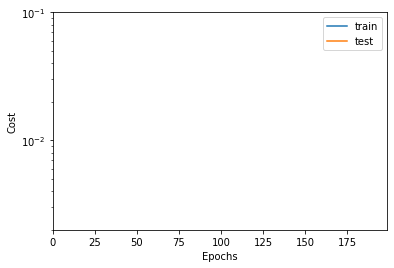

In [10]:
#analyse cost as function of epochs
epochs = gradD.result_data[:,0]
train_costs = gradD.result_data[:,1]
test_costs = gradD.result_data[:,3]

plt.semilogy(epochs, train_costs, label="train")
plt.semilogy(epochs, test_costs, label="test")
plt.ylabel('Cost')
plt.xlabel('Epochs')
xmax = epochs[-1]
ymin = 2e-3
ymax = 1e-1
plt.axis([0,xmax,ymin,ymax])
plt.legend()
plt.show() 

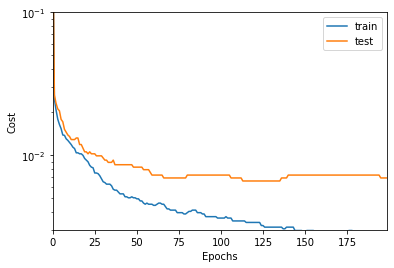

In [11]:
#analyse error as function of epochs
epochs = gradD.result_data[:,0]
train_error = gradD.result_data[:,2]
test_error = gradD.result_data[:,4]

plt.semilogy(epochs, train_error, label="train")
plt.semilogy(epochs, test_error, label="test")
plt.ylabel('Cost')
plt.xlabel('Epochs')
xmax = epochs[-1]
ymin = 3e-3
ymax = 1e-1
plt.axis([0,xmax,ymin,ymax])
plt.legend()
plt.show() 

(21, 784)


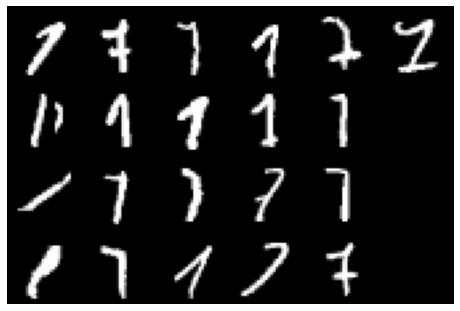

In [12]:
#analyse false classified training or test images
#false_classifications = x_train[(np.round(gradD.y_pred[0]) != y_train)[:,0],:]
false_classifications = x_test[(np.round(gradD.y_pred[1]) != y_test)[:,0],:]

print(false_classifications.shape)

#append rows x cols tiles of digits
rows = 4
cols = 7
#figure size can be set
fig_size = [8,8]

plot_tiles(false_classifications, rows, cols, fig_size)

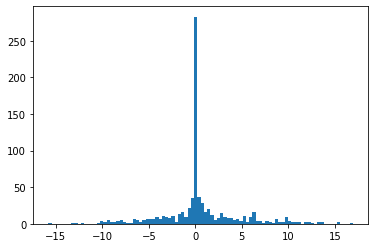

In [13]:
#analyse histogram of weights
fig = plt.hist(gradD.w, bins = 'auto')

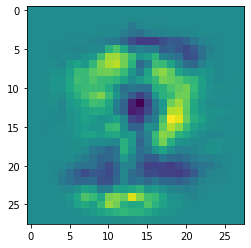

In [14]:
plt.imshow(gradD.w.reshape((28,28)))